In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.1/752.1 kB 42.9 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 28.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import wandb
from kaggle_secrets import UserSecretsClient
from ultralytics import YOLO

In [4]:
user_secrets = UserSecretsClient()

my_secret = user_secrets.get_secret("wandb_api_key") 

wandb.login(key=my_secret)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

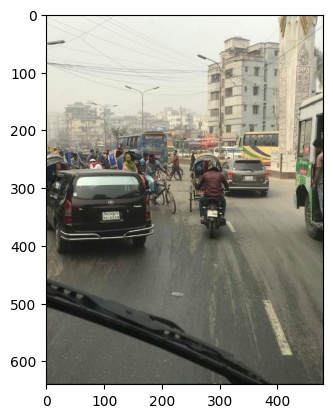

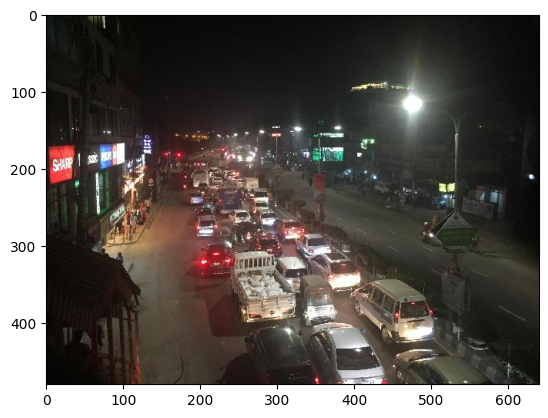

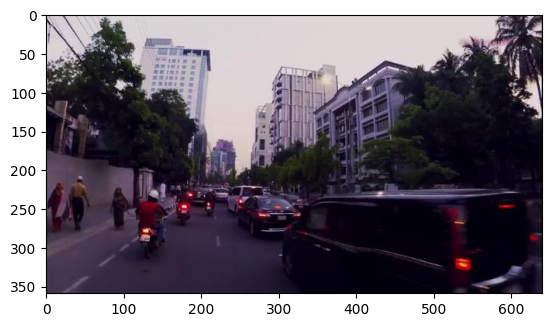

In [5]:
sample1 = mpimg.imread('/kaggle/input/road-vehicle-images-dataset/trafic_data/train/images/117_jpg.rf.18750bf5294c819c62036a003c67cfa2.jpg')
sample2 = mpimg.imread('/kaggle/input/road-vehicle-images-dataset/trafic_data/train/images/08_jpg.rf.837e69c4e93e62472911c1d18be143a4.jpg')
sample3 = mpimg.imread('/kaggle/input/road-vehicle-images-dataset/trafic_data/valid/images/Pias--162-_jpg.rf.7dc614f614576d79330a3f05a112e484.jpg')
plt.imshow(sample1)
plt.show()
plt.imshow(sample2)
plt.show()
plt.imshow(sample3)
plt.show()

In [6]:
# Load a model
model = YOLO('yolov8n.pt')


# Train the model
results = model.train(data='/kaggle/input/road-vehicle-images-dataset/trafic_data/data_1.yaml', epochs=20, imgsz=640)

100%|██████████| 6.23M/6.23M [00:00<00:00, 211MB/s]


Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/road-vehicle-images-dataset/trafic_data/data_1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

100%|██████████| 755k/755k [00:00<00:00, 79.6MB/s]
2024-04-28 09:14:51,070	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-28 09:14:52,761	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Currently logged in as: m4257066 (hjty). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240428_091457-er9ld3lm
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/hjty/YOLOv8
wandb: 🚀 View run at https://wandb.ai/hjty/YOLOv8/runs/er9ld3lm


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/road-vehicle-images-dataset/trafic_data/train/labels... 2704 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2704/2704 [00:11<00:00, 242.34it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/road-vehicle-images-dataset/trafic_data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/road-vehicle-images-dataset/trafic_data/valid/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:01<00:00, 247.44it/s]

val: WARNING ⚠️ /kaggle/input/road-vehicle-images-dataset/trafic_data/valid/images/Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/road-vehicle-images-dataset/trafic_data/valid/images/Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


val: WARNING ⚠️ Cache directory /kaggle/input/road-vehicle-images-dataset/trafic_data/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.42G      1.508      3.402       1.17        217        640: 100%|██████████| 169/169 [00:41<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]


                   all        300       2568      0.531      0.166      0.128     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.96G      1.459      2.206      1.168        202        640: 100%|██████████| 169/169 [00:33<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.60it/s]

                   all        300       2568      0.504       0.21      0.183      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       3.4G      1.436      1.948      1.152        247        640: 100%|██████████| 169/169 [00:33<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]

                   all        300       2568      0.576      0.218      0.218       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.25G      1.417      1.847      1.144        273        640: 100%|██████████| 169/169 [00:33<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]


                   all        300       2568      0.562      0.257      0.249      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.28G      1.369      1.748      1.131        158        640: 100%|██████████| 169/169 [00:33<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

                   all        300       2568       0.62      0.249      0.277      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.48G      1.351      1.661      1.121        220        640: 100%|██████████| 169/169 [00:32<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.58it/s]

                   all        300       2568       0.65      0.272      0.288      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.55G      1.349      1.618      1.117        211        640: 100%|██████████| 169/169 [00:33<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.52it/s]

                   all        300       2568      0.635      0.301      0.299      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.29G      1.328      1.567      1.105        146        640: 100%|██████████| 169/169 [00:33<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.19it/s]

                   all        300       2568      0.636      0.292      0.303      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       3.7G      1.304      1.508      1.095        347        640: 100%|██████████| 169/169 [00:33<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]

                   all        300       2568      0.601      0.306      0.303      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.28G      1.294      1.471      1.096        202        640: 100%|██████████| 169/169 [00:32<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.57it/s]

                   all        300       2568      0.535      0.288      0.328      0.199


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.92G      1.293      1.511      1.083        108        640: 100%|██████████| 169/169 [00:34<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        300       2568      0.646      0.295      0.308      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.87G      1.274      1.434      1.071        122        640: 100%|██████████| 169/169 [00:32<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.23it/s]

                   all        300       2568      0.678      0.295      0.325        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         3G      1.265      1.388      1.068         88        640: 100%|██████████| 169/169 [00:32<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        300       2568      0.623      0.344      0.343      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.96G      1.247      1.351      1.058        125        640: 100%|██████████| 169/169 [00:32<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]

                   all        300       2568      0.664      0.313      0.354       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.98G      1.245      1.314      1.058        158        640: 100%|██████████| 169/169 [00:31<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]

                   all        300       2568      0.619      0.343      0.355      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.75G       1.22      1.285      1.049        160        640: 100%|██████████| 169/169 [00:32<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.55it/s]

                   all        300       2568      0.658      0.335      0.357      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.08G      1.212      1.257      1.045         76        640: 100%|██████████| 169/169 [00:32<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        300       2568      0.523      0.404      0.357      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.06G      1.207      1.235       1.04        107        640: 100%|██████████| 169/169 [00:31<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]

                   all        300       2568      0.636      0.344      0.363      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.99G      1.191      1.217      1.034        161        640: 100%|██████████| 169/169 [00:32<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]

                   all        300       2568       0.56      0.395      0.391      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.01G      1.183      1.202      1.032        143        640: 100%|██████████| 169/169 [00:32<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]

                   all        300       2568      0.579       0.39      0.378      0.233



20 epochs completed in 0.202 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


                   all        300       2568       0.56      0.395      0.391      0.246
               bicycle        300         32      0.515      0.438       0.42      0.179
                   bus        300        425      0.682      0.559      0.633      0.421
                   car        300        842      0.664      0.748      0.764       0.51
               minibus        300          2      0.319        0.5      0.502      0.398
               minivan        300        110      0.411      0.455      0.374      0.261
             motorbike        300        335       0.47      0.531      0.473      0.154
                pickup        300        142      0.409      0.296      0.351      0.214
             policecar        300          1          1          0          0          0
              rickshaw        300        192      0.576      0.698      0.668      0.422
               scooter        300          1          1          0          0          0
                   su

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:                  lr/pg1 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:                  lr/pg2 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:        metrics/mAP50(B) ▁▂▃▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
wandb:     metrics/mAP50-95(B) ▁▂▃▄▅▅▅▆▅▆▆▆▆▇▇▇▇▇██
wandb:    metrics/precision(B) ▂▁▄▃▆▇▆▆▅▂▇█▆▇▆▇▂▆▃▃
wandb:       metrics/recall(B) ▁▂▃▄▃▄▅▅▅▅▅▅▆▅▆▆█▆██
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▆▅▅▅▄▄▃▃▃▃▂▂▂▂▂▁▁
wandb:          train/cls_loss █▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
wandb:          train/dfl_loss ██▇▇▆▆▅▅▄▄▄▃▃▂▂▂▂▁▁▁
wandb:            val/box_loss █▄▇▄▃▃▄▃▂▂▃▂▃▂▁▂▁▂▂▁
wandb:            val/cls_loss █▅▅▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
wandb:            val/dfl_loss █▅▇▅▃▄▅▃▃▃▄▃▂▂▂▂▂▂▂▁
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 2e-05
wandb:                  lr/pg1 2e-05
wandb:  

In [7]:
# Load a model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt') 

# Validate the model
metrics = model.val() 

Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/road-vehicle-images-dataset/trafic_data/valid/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 463.31it/s]

val: WARNING ⚠️ /kaggle/input/road-vehicle-images-dataset/trafic_data/valid/images/Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/road-vehicle-images-dataset/trafic_data/valid/images/Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed
val: WARNING ⚠️ Cache directory /kaggle/input/road-vehicle-images-dataset/trafic_data/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]


                   all        300       2568       0.56      0.394       0.39      0.246
               bicycle        300         32      0.518      0.438      0.417      0.186
                   bus        300        425      0.679      0.558      0.634       0.42
                   car        300        842      0.664      0.748      0.764       0.51
               minibus        300          2      0.322        0.5      0.502      0.398
               minivan        300        110      0.411      0.455      0.375      0.261
             motorbike        300        335      0.463      0.522      0.466      0.153
                pickup        300        142       0.41      0.296      0.351      0.215
             policecar        300          1          1          0          0          0
              rickshaw        300        192      0.576      0.698      0.669      0.422
               scooter        300          1          1          0          0          0
                   su

In [8]:
model("/kaggle/input/road-vehicle-images-dataset/trafic_data/valid/images/Pias--163-_jpg.rf.3f21db8698ebce547a4e04f773a8f3f7.jpg", save=True)


image 1/1 /kaggle/input/road-vehicle-images-dataset/trafic_data/valid/images/Pias--163-_jpg.rf.3f21db8698ebce547a4e04f773a8f3f7.jpg: 384x640 7 cars, 5 motorbikes, 1 suv, 76.4ms
Speed: 1.3ms preprocess, 76.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ambulance', 1: 'army vehicle', 2: 'auto rickshaw', 3: 'bicycle', 4: 'bus', 5: 'car', 6: 'garbagevan', 7: 'human hauler', 8: 'minibus', 9: 'minivan', 10: 'motorbike', 11: 'pickup', 12: 'policecar', 13: 'rickshaw', 14: 'scooter', 15: 'suv', 16: 'taxi', 17: 'three wheelers -CNG-', 18: 'truck', 19: 'van', 20: 'wheelbarrow'}
 obb: None
 orig_img: array([[[ 36,   9,  19],
         [ 36,   4,  15],
         [ 59,  21,  33],
         ...,
         [136, 116, 129],
         [ 60,  40,  53],
         [ 60,  40,  53]],
 
        [[ 33,   6,  16],
         [ 39,   9,  20],
         [ 58,  20,  32],
         ...,
         [115,  95, 108],
         [ 55,  35,  48],
         [ 28,   8,  21]],
 
        [[ 30,   5,  15],
         [ 43,  16,  26],
         [ 53,  19,  30],
         ...,
         [109,  91, 104],
         [ 35,  17,  30],
         [ 39,

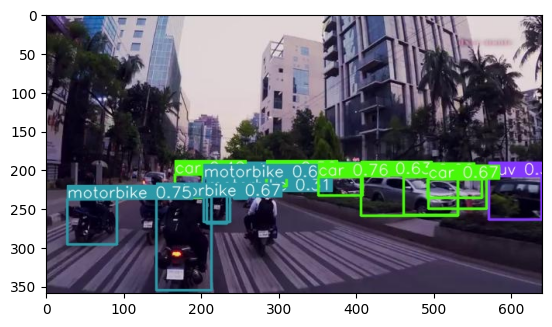

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
test = mpimg.imread('/kaggle/working/runs/detect/predict/Pias--163-_jpg.rf.3f21db8698ebce547a4e04f773a8f3f7.jpg')
plt.imshow(test)

In [10]:
# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 25, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 204.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 204.5 MB/s eta 0:00:00
   ━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 127MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.33file/s]


ONNX: starting export with onnx 1.16.0 opset 17...


ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 1.4s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success ✅ 57.2s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.13.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (58.7s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/input/road-vehicle-images-dataset/trafic_data/data_1.yaml  
Visualize:       https://netron.

'/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite'